
# Udacity Data Analyst Nanodegree Program
## Project 3. Wrangle and Analyze Twitter Data

author: Andrew Nachtigal  

> #### Table of Contents
> <ul>
> <li><a href="#intro">Introduction</a></li>
> <li><a href="#wrangling">Data Wrangling</a></li>
> <li><a href="#gather">Data Gathering</a></li> 
> <li><a href="#assess">Data Assessment</a></li> 
> <li><a href="#clean">Data Cleaning</a></li> 
> <li><a href="#eda">Exploratory Data Analysis</a></li>
> <li><a href="#conclusions">Conclusions</a></li>
> </ul>

<a id='intro'></a>
## Introduction

This purpose of this project is to gather, assess, and clean data from the WeRateDogs Twitter API as well as provided archive data and image prediction datasets. The data wrangling process is documented in this jupyter notebook and separate report.

__The Data Wrangling Process__

Data wrangling is the process of organizing, cleaning, and transforming data from one format3 into another more appropriate and useful for data analysis. This process consists of data gathering, data assessment, and data cleaning.


__Data Description__

Three datasets were used in this project.

> 1. WeRateDogs Twitter Archive Data: 'twitter_archive_enhanced.csv'
This data set contains information for 2356 tweets containing dog ratings from the WeRateDogs twitter account.
>
>2. Dog Image Prediction Data: 'image_predictions.tsv'
The top three image prediction results from a neural network classification model that predicts dog breed based on image. What breed of dog or other object, animal is present in each tweet according to a neural network.
>
>3. WeRateDogs Twitter API Query: retweet count, favorite count, etc.
Additional WeRateDogs tweet information is queried directly through the twitter developer API. 



******

#### Load Libraries

In [1]:
# import standard packages
import pandas as pd
import datetime as dt
import numpy as np
from numpy import nan as NaN
import requests
import os
import re

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('classic')
%matplotlib inline


In [2]:
# import twitter API and nltk packages
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pprint as pp


******

<a id='wrangling'></a>
## Data Wrangling 

1. Gather
2. Assess
3. Clean


<a id='gather'></a>
### Step 1. Gather Data


#### Data Set 1. WeRateDogs Twitter Data Archive

> * data source: Udacity servers
* file format: csv
* manual download


In [3]:
# load twitter archive data
df_tweet_archive = pd.read_csv('data/twitter-archive-enhanced.csv')


In [4]:
df_tweet_archive.head(3)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### Data Set 2. Image Predictions Data
> * .tsv file format
* programmatically download image prediction file with requests
* use file i/o to save to local machine



In [5]:
# make directory for download files
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
# download 'image_predictions' file using requests
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_predictions_url)

# use file i/o to save to local using write/binary
with open(os.path.join(folder_name, image_predictions_url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
# assign image_prediction data to pandas dataframe
df_image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

# save dataframe to file
df_image_predictions.to_csv('data/df_image_predictions.txt', encoding='utf-8', index=False)


In [6]:
df_image_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Data Set 3. WeRateDogs Twitter API Query

> * file format: JSON
* query twitter API for tweet_id JSON data
* store tweet JSON data as tweet_json.txt


In [7]:
# get tweet_ids for API query
tweet_archive_ids = df_tweet_archive.tweet_id
tweet_archive_ids.head()


0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [8]:
# create an OAuthHandler instance to pass consumer token and secret

consumer_key = '*' # 'YOUR CONSUMER KEY'
consumer_secret = '*' # 'YOUR CONSUMER SECRET'
access_token = '*' # 'YOUR ACCESS TOKEN'
access_token_secret = '*' # 'YOUR ACCESS SECRET'

"""
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
"""

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)



In [9]:
# query Twitter's API for JSON data for each tweet ID in the Twitter archive
# api.get_status returns a singl status specified by the ID parameter

count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('data/tweet_json_2.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_archive_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            api_tweets = api.get_status(tweet_id, tweet_mode='extended')
            #print('Success')
            json.dump(api_tweets._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            #print('Error')
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start);
# print(fails_dict)


1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 8841626705843773

Rate limit reached. Sleeping for: 695


901: 758740312047005698
902: 758474966123810816
903: 758467244762497024
904: 758405701903519748
905: 758355060040593408
906: 758099635764359168
907: 758041019896193024
908: 757741869644341248
909: 757729163776290825
910: 757725642876129280
911: 757611664640446465
912: 757597904299253760
913: 757596066325864448
914: 757400162377592832
915: 757393109802180609
916: 757354760399941633
917: 756998049151549440
918: 756939218950160384
919: 756651752796094464
920: 756526248105566208
921: 756303284449767430
922: 756288534030475264
923: 756275833623502848
924: 755955933503782912
925: 755206590534418437
926: 755110668769038337
927: 754874841593970688
928: 754856583969079297
929: 754747087846248448
930: 754482103782404096
931: 754449512966619136
932: 754120377874386944
933: 754011816964026368
934: 753655901052166144
935: 753420520834629632
936: 753398408988139520
937: 753375668877008896
938: 753298634498793472
939: 753294487569522689
940: 753039830821511168
941: 753026973505581056
942: 75293243274

Rate limit reached. Sleeping for: 712


1801: 676975532580409345
1802: 676957860086095872
1803: 676949632774234114
1804: 676948236477857792
1805: 676946864479084545
1806: 676942428000112642
1807: 676936541936185344
1808: 676916996760600576
1809: 676897532954456065
1810: 676864501615042560
1811: 676821958043033607
1812: 676819651066732545
1813: 676811746707918848
1814: 676776431406465024
1815: 676617503762681856
1816: 676613908052996102
1817: 676606785097199616
1818: 676603393314578432
1819: 676593408224403456
1820: 676590572941893632
1821: 676588346097852417
1822: 676582956622721024
1823: 676575501977128964
1824: 676533798876651520
1825: 676496375194980353
1826: 676470639084101634
1827: 676440007570247681
1828: 676430933382295552
1829: 676263575653122048
1830: 676237365392908289
1831: 676219687039057920
1832: 676215927814406144
1833: 676191832485810177
1834: 676146341966438401
1835: 676121918416756736
1836: 676101918813499392
1837: 676098748976615425
1838: 676089483918516224
1839: 675898130735476737
1840: 675891555769696257


#### Extract Tweet Attributes From API JSON Data

Tweet Data Elements to Extract to DataFrame:

> * tweet_id
* created_at
* text
* favorite count
* retweet count


In [10]:
# examine first tweet for dict structure, attributes
with open('data/tweet_json.txt') as json_file:
    line = json_file.readline()
    tweet = json.loads(line)
    pp.pprint(tweet)


{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Nov 15 22:32:08 +0000 2015',
 'display_text_range': [0, 131],
 'entities': {'hashtags': [],
              'media': [{'display_url': 'pic.twitter.com/BLDqew2Ijj',
                         'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
                         'id': 666020881337073664,
                         'id_str': '666020881337073664',
                         'indices': [108, 131],
                         'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
                         'sizes': {'large': {'h': 720,
                                             'resize': 'fit',
                                             'w': 960},
                                   'medium': {'h': 720,
                                              'resize': 'fit',
                                  

In [11]:
# extract interesting tweet attributes
with open('data/tweet_json.txt') as json_file:
    tweet_attrib = pd.DataFrame(columns = ['tweet_id', 'created_at', 'favorite_count', 'retweet_count', 'retweeted'])
    
    for line in json_file:
        tweet = json.loads(line)
        tweet_attrib = tweet_attrib.append({'tweet_id': tweet['id'],
                                            'created_at': tweet['created_at'],
                                            'favorite_count': tweet['favorite_count'],
                                            'retweet_count': tweet['retweet_count'],
                                            'retweeted': tweet['retweeted']}, ignore_index=True)
                                                

******

<a id='assess'></a>
### Step 2. Data Assessment



__Data Quality__
      
> Data Quality issues include:
* Completeness/missing data:
* Validity: data conforms to a defined schema or set of rules for data. 
* Accuracy: data is wrong data adheres to the defined schema, but it is still incorrect. 
* Consistency: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing.

__Data Structure/Tidy Data__


> The first step of a data analysis project is to inspect and transform the data into a single, tidy dataset which will be easy to work with. Tidy data is characterized by the following principles:
* Each variable must have its own column.  
* Each observation must have its own row.  
* Each value must have its own cell.  


In [12]:
# load datasets
df_tweet_archive = pd.read_csv('data/twitter-archive-enhanced.csv')
df_image_predictions = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
df_tweet_attrib = pd.read_csv('data/tweet_atrib.csv')


In [13]:
# make clean copies of dataframes per instructions
df_tweet_archive_clean = df_tweet_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_tweet_attrib_clean = df_tweet_attrib.copy()


### Tweet Archive Data Assessment

In [14]:
# first rows
df_tweet_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [15]:
# data set summmary information
df_tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Image Predictions Data Assessment

In [16]:
# data set summmary information
df_image_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API Query Data Assessment

In [18]:
# first rows
df_tweet_attrib.head()

,Unnamed: 0,tweet_id,created_at,favorite_count,retweet_count,retweeted
0,0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,37659,8208,False
1,1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,32353,6072,False
2,2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,24373,4014,False
3,3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,40966,8359,False
4,4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,39174,9063,False


In [19]:
# data set summmary information
df_tweet_attrib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 6 columns):
Unnamed: 0        2339 non-null int64
tweet_id          2339 non-null int64
created_at        2339 non-null object
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
retweeted         2339 non-null bool
dtypes: bool(1), int64(4), object(1)
memory usage: 93.7+ KB


******

<a id='clean'></a>
### Step 3. Data Cleaning

Programmatic Data Cleaning
* Define statement of the data quality or tidiness issue.
* Implement code to resolve the issue.
* Perform test(s) to verify that the issue has been resolved.


#### Define Data Issues to Resolve

The following quality and structure issues are resolved:

__Merge three datasets for data cleaning.__

> __Quality Issues__
0. Drop tweets without images.
1. Drop retweets: Only original tweets should be considered
2. Rating numerator: Convert rating data types from int to float.
3. Rating denominator: Convert rating data types from int to float.
4. Extract dog names from text, and add new name variable to dataset.
5. Combine four dog stages to one variable column.
6. Timestamp variable: Convert to datetime object.
7. Clean image prediction breed names and Create a single column breed prediction variable.
8. Drop tweets with non-dog images.


> __Tidy Data Issues__
0. Combine Dog Stages from four columns to one column
1. Combine dog rating numerator and denominator to one column


__Drop columns not used for further analysis.__


### Filter Data Sets on Common Ids and Merge into Single DataFrame

> * find intersection of 'country' Series for indicator variables
* filter dataframes using intersection set

In [20]:
# tweet_ids
id_1 = df_tweet_archive.tweet_id
id_2 = df_image_predictions.tweet_id
id_3 = df_tweet_attrib.tweet_id

# the set intersection of df_tweet_archive and df_image_predictions will eliminate tweets without pictures.
u_set = set.intersection(set(df_tweet_archive['tweet_id']), set(df_image_predictions['tweet_id']), set(df_tweet_attrib['tweet_id']))

# lengths of separate and common data sets
l_1 = id_1.size
l_2 = id_2.size
l_3 = id_3.size
l_4 = len(u_set)

print("lengths of individual and common data sets:\n\
      tweet archive after dropping retweets: {} \n\
      image predictions : {} \n\
      api tweets : {} \n\
      intersection set: {} ".format(l_1, l_2, l_3, l_4))


lengths of individual and common data sets:
      tweet archive after dropping retweets: 2356 
      image predictions : 2075 
      api tweets : 2339 
      intersection set: 2066 


In [21]:
# filter on tweet_ids 
def tweet_id_filter(dataFrame):
    dataFrame = dataFrame[dataFrame.tweet_id.isin(u_set)]
    return dataFrame

# indicator dataframes to filter
data_Frames = [df_tweet_archive, df_image_predictions, df_tweet_attrib];
common_tweet = list()

for df in data_Frames:
    common_tweet.append(tweet_id_filter(df))


In [22]:
# reset index
common_tweet[0].reset_index(drop=True, inplace=True)
common_tweet[1].reset_index(drop=True, inplace=True)
common_tweet[2].reset_index(drop=True, inplace=True)


### Merge Data Sets for Cleaning

In [23]:
# merge three dataframes
common_tweets = pd.merge(common_tweet[0], common_tweet[1], how='left', on=['tweet_id'])
common_tweets = pd.merge(common_tweets, common_tweet[2], how='left', on=['tweet_id'])

In [24]:
# test: examine first few rows of merged dataframe
common_tweets.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,created_at,favorite_count,retweet_count,retweeted
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,0,Tue Aug 01 16:23:56 +0000 2017,37659,8208,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,1,Tue Aug 01 00:17:27 +0000 2017,32353,6072,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,2,Mon Jul 31 00:18:03 +0000 2017,24373,4014,False


In [25]:
# test: examine summary information of merged dataframe
common_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 33 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
doggo                         2066 non-null object
floofer                       2066 non-null object
pupper                        2066 non-null object
puppo                         2066 non-null object
jpg_url                       2066 

## Quality & Tidiness Issues

### Quality Issue: Drop Tweets Without Images
> * This was accomplished through merging with the image prediction dataset.

__Test for No-Images__

In [26]:
# image data is stored in 'expanded_urls' attribute. missing data indicates missing images. zero means no image.
sum(common_tweets['expanded_urls'].isnull())


0

### Quality Issue: Drop Retweets
> * Remove retweets. Only original tweets are necessary.

In [27]:
# drop retweets
common_tweets = common_tweets[pd.isnull(common_tweets.retweeted_status_id)]


__Test for Retweets__

In [28]:
# should be 1991 - all NaN values
sum(common_tweets['retweeted_status_id'].isnull())


1991

### Quality Issue: Dog Ratings

Dog ratings contain a wide dispersion of scores, from 0 to 1776, which seem extreme. But for a humorous twitter account, unusual or extreme scores may be the point.

> * Numerators Data type 'rating_numerator'
* Denominator Data type 'rating_denominator'
* convert int fraction to float

### Convert Ratings Data Type from Int to Float

In [29]:
# Ratings are initially integers
type(common_tweets.rating_numerator[0]), type(common_tweets.rating_denominator[0])

(numpy.int64, numpy.int64)

In [30]:
# convert numerator to floats
common_tweets.rating_numerator = common_tweets.rating_numerator.astype(float)

# convert denominator to floats
common_tweets.rating_denominator = common_tweets.rating_denominator.astype(float)

__Test Ratings Data Type Conversion__

In [31]:
# test data type - should be float
type(common_tweets.rating_numerator[0]),type(common_tweets.rating_denominator[0])


(numpy.float64, numpy.float64)

### Tidy Data Issue: Combine Rating into Single Column
> combine numerator and denominator ratings columns

In [32]:
# create new variable for ratings
common_tweets['rating_float'] = common_tweets['rating_numerator']/common_tweets['rating_denominator']

__Test__

In [33]:
# look at ratings 
common_tweets['rating_float'][:5]

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating_float, dtype: float64

### Quality Issue: Dog Names

Visually examine dog names

> * Dog Names column has many non names
* Get names from text


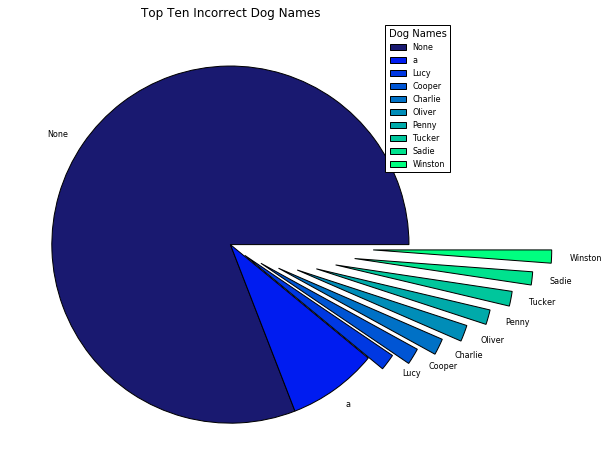

In [34]:
# pie chart name visualization - top 50 names

# graph inputs: ordered list of dog names and number of occurrences
dog_names = list(common_tweets.name.value_counts()[:10].index)
counts = pd.Series(list(common_tweets.name.value_counts()[:10]),
                  index=dog_names)

explode = (0, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8)

colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80' ]

counts.plot(kind='pie', figsize=(8,8), fontsize=8, colors=colors, explode=explode)
plt.title('Top Ten Incorrect Dog Names')
plt.ylabel('')
plt.legend(labels=counts.index, title='Dog Names', loc='best', prop={'size': 8});

# save as png
plt.savefig('plots/incorrect-names.png', bbox_inches='tight')

### Programmatic Exploration of Dog Names

In [35]:
# Names are proper nouns and capitalized - rows containing lowercase names indicates an error
common_tweets.loc[(common_tweets['name'].str.islower())][:3]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,Unnamed: 0,created_at,favorite_count,retweet_count,retweeted,rating_float
21,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,...,False,shopping_cart,0.026321,False,21,Wed Jul 19 03:39:09 +0000 2017,45046,11318,False,1.4
50,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,...,False,Persian_cat,0.114854,False,55,Sun Jul 02 15:32:16 +0000 2017,48114,15471,False,1.4
138,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,...,True,Persian_cat,0.128383,False,162,Tue May 02 00:04:57 +0000 2017,89696,30413,False,1.2


In [36]:
# lowercase names are probably not names
lower_case = common_tweets.loc[(common_tweets['name'].str.islower())]['name']
lower_case[:10]


21           such
50              a
138         quite
152         quite
288           one
433    incredibly
518             a
641             a
657          very
685            my
Name: name, dtype: object

### Extract Names From text
#### Syntactic Naming Patterns

The author generally emplpoys a standard set of syntactic patterns to introduce and name a dog, inluding:
* This is ...
* Meet ...
* Say hallo to ...
* ... named ...

In [37]:
# check for syntactic pattern in text and make a list of results
doggo_names = []

for text in common_tweets['text']:
    
    '''
    Search terms:
    'This is ...'
    'Meet '
    'Say hello to '
    'Here we have '
    ' ... named ...' + uppercase word
    '''
    
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        doggo_names.append(text.split()[2].strip(',').strip('.'))
        
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        doggo_names.append(text.split()[1].strip(',').strip('.'))
        
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        doggo_names.append(text.split()[3].strip(',').strip('.'))
        
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        doggo_names.append(text.split()[3].strip(',').strip('.'))
        
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        doggo_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
        
    else: doggo_names.append(NaN)
        


In [38]:
# add new dog names to dataframe
common_tweets['doggo_names'] = pd.DataFrame(doggo_names)


__Test Dog Names__

In [39]:
# most frequent names
common_tweets['doggo_names'].value_counts()[:10]



Oliver     10
Lucy        9
Charlie     9
Penny       9
Cooper      9
Sadie       8
Winston     8
Tucker      8
Daisy       7
Lola        7
Name: doggo_names, dtype: int64

In [40]:
# least frequent dog names
common_tweets['doggo_names'].value_counts()[-10:]



Pepper     1
Eugene     1
Binky      1
Luther     1
Rooney     1
Crimson    1
Dale       1
Franq      1
Quinn      1
Corey      1
Name: doggo_names, dtype: int64

In [41]:
# how many missing dog names
sum(common_tweets['doggo_names'].isna())



679

In [42]:
# remove rows with missing name
common_tweets.dropna(subset=['doggo_names'], inplace=True)



In [43]:
# rows with names == 'a'
sum(common_tweets['doggo_names'] == 'a')
    
    

0

In [44]:
# test length of new dataframe: 1991 - 679 = 1312
len(common_tweets)


1312

### Tidy Data Issue: Combine Dog Stage Data Into Single Column

### Dog Stages

Dog Stage catetgories from 'The dogtionary":

> * doggo: a big pupper, usually older or a pupper that appears to have its life in order: probably understands taxes and whatnot.
* pupper: a small doggo, usually younger or a doggo that is inexperienced, unfamiliar, in any way unprepared for the responsibilities associated with being a doggo.
* puppo: a transitional phase between pupper and doggo: a teenager or a dog with a mixed bag of both pupper and doggo tendencies.
* floof: any dog with seemingly excess fur.
* belp: an extremely subtle act that occurs without the knowledge of the one who slips, including one's tongue protruding ever so slightly from the mouth, usually just noticeable enough that it attracts the attention it deserves.


In [45]:
# make iterable list of lists for each row of dog stage columns: 'doggo', 'floofer', 'pupper', 'puppo'

# convert dog stage pandas rows into iterable list
cat_vars = []
for row in common_tweets.iloc[:,13:17].iterrows():
    index, data = row
    cat_vars.append(data.tolist())
    

In [46]:
# enumerate over list of lists

def melt_categorical(dataframe):
    '''
    combine dog_stage categorical names into single column
    '''
    with open('melt_catagorical.txt', 'w') as f:

        for index, sub_list in enumerate(dataframe):
            temp_row = []
            for ds_string in sub_list:
                if ds_string == 'None':
                    continue
                if (ds_string == 'doggo' or ds_string == 'floofer' or ds_string == 'pupper' or ds_string == 'puppo'):
                    temp_row.append(ds_string)
            
            #print([''.join(temp_row)])
            
            f.writelines( ''.join(temp_row) + ',' + '\n')

# writes dog_stage data to csv
melt_categorical(cat_vars)


In [47]:
# read categorical data from csv
dog_stages = pd.read_csv('melt_catagorical.txt', na_values=' ', keep_default_na=True)


In [48]:
# add new dog_stage column to dataframe
common_tweets['dog_stages'] = dog_stages['Unnamed: 0']


__Test Dog Stage__

In [49]:
# examine aggregated frequency of dog stages
common_tweets['dog_stages'].value_counts()


pupper          90
doggo           33
doggopupper      9
puppo            8
floofer          4
doggofloofer     1
Name: dog_stages, dtype: int64

__There are many missing dog stages.__

### Quality Issue: Change Timestamp to Datetime


In [50]:
# check first few rows and dtype
common_tweets['timestamp'][:5]


0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [51]:
# convert pandas column to DateTime
common_tweets['timestamp'] = pd.to_datetime(common_tweets['timestamp'])


__Test DateTime Conversion__

In [52]:
# check first few rows and dtype
common_tweets['timestamp'][:5]


0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Quality Issue: Clean Image Prediction Breed Names

Clean image prediction breed variable.

> For p1:
* Remove underscore
* Capitalize Proper Names

In [53]:
# remove underscores 
common_tweets['p1'] = common_tweets['p1'].str.replace('_', ' ')

# capitalize breed names


__Test Breed Names__

In [54]:
# Breed names should capitalized
common_tweets['p1'].head()


0         orange
1      Chihuahua
2      Chihuahua
3    paper towel
4         basset
Name: p1, dtype: object

In [55]:
# most frequent breeds
common_tweets['p1'].value_counts()[:10]


golden retriever      95
Labrador retriever    72
Pembroke              55
Chihuahua             50
chow                  31
Samoyed               31
pug                   29
Pomeranian            25
French bulldog        21
toy poodle            20
Name: p1, dtype: int64

In [56]:
# least frequent breeds
common_tweets['p1'].value_counts()[-10:]


pitcher              1
water bottle         1
damselfly            1
shopping cart        1
military uniform     1
tailed frog          1
giant panda          1
African crocodile    1
silky terrier        1
skunk                1
Name: p1, dtype: int64

In [57]:
# rename p1 to breed
common_tweets.rename(columns={'p1': 'breed'}, inplace=True)


### Drop Non-Dog Image Predictions

### Quality Issue: Tweets with Non-Dogs Images

Drop non-dog tweets and create a single-column breed prediction variable.

> * Filter tweets based on p1_dog prediction: True/False


In [58]:
# drop tweets with images of non-dogs as predicted by the image classifier
common_tweets = common_tweets[common_tweets['p1_dog']]


__Test Non-Dog Images__

In [59]:
# length
len(common_tweets)

986

In [60]:
# least frequent breeds
common_tweets['breed'].value_counts()


golden retriever                  95
Labrador retriever                72
Pembroke                          55
Chihuahua                         50
Samoyed                           31
chow                              31
pug                               29
Pomeranian                        25
French bulldog                    21
toy poodle                        20
cocker spaniel                    19
malamute                          19
Siberian husky                    17
Chesapeake Bay retriever          15
Shetland sheepdog                 15
German shepherd                   15
miniature pinscher                15
Eskimo dog                        13
Lakeland terrier                  12
Cardigan                          12
Staffordshire bullterrier         12
kuvasz                            12
Maltese dog                       11
basset                            11
beagle                            10
Great Pyrenees                    10
Shih-Tzu                          10
A

### Clean Up DataFrame for EDA
Data variables columns to keep for further analysis and visualization
> * tweet_id
* timestamp
* breed
* favorite_count
* rewteet_count
* doggo_names
* dog_stages
* ratings_float


In [61]:
list(common_tweets)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'breed',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'Unnamed: 0',
 'created_at',
 'favorite_count',
 'retweet_count',
 'retweeted',
 'rating_float',
 'doggo_names',
 'dog_stages']

In [62]:
# drop unused variable columns 
common_tweets.drop([
    'in_reply_to_status_id',
 'in_reply_to_user_id', 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'Unnamed: 0',
 'created_at',
 'retweeted'
] , axis=1, inplace=True)

In [63]:
# check dataframe 
common_tweets.head()

,tweet_id,timestamp,breed,favorite_count,retweet_count,rating_float,doggo_names,dog_stages
1,892177421306343426,2017-08-01 00:17:27,Chihuahua,32353,6072,1.3,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Chihuahua,24373,4014,1.2,Archie,NaN
4,891327558926688256,2017-07-29 16:00:24,basset,39174,9063,1.2,Franklin,NaN
6,890971913173991426,2017-07-28 16:27:12,Appenzeller,11520,1988,1.3,Jax,doggo
8,890609185150312448,2017-07-27 16:25:51,Irish terrier,27087,4129,1.3,Zoey,NaN


### Save Merged and Cleaned DataFrame to File

In [64]:
# write cleaned and merged dataframe to csv
common_tweets.to_csv('data/twitter_archive_master.csv')


In [65]:
# read cleaned data file
dogs = pd.read_csv('data/weratedogs_clean.csv')


******

<a id='eda'></a>
## Exploratory Data Analysis and Data Visualization

Compare Dog Tweet Data
* Dog Names
* Dog Ratings
* Dog Stages
* Dog Breeds
* Tweet Timestamp


### Dog Names EDA

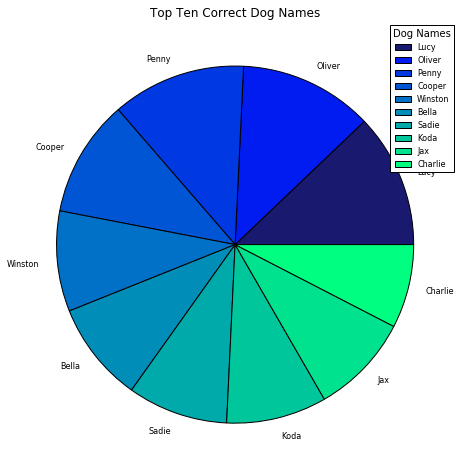

In [66]:
# top 50 names visualized

# graph inputs: ordered list of dog names and number of occurrences
dog_names = list(dogs.doggo_names.value_counts()[:10].index)
counts = pd.Series(list(dogs.doggo_names.value_counts()[:10]),
                  index=dog_names)

explode = (0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80' ]

counts.plot(kind='pie', figsize=(8,8), fontsize=8, colors=colors, explode=explode)
plt.title('Top Ten Correct Dog Names')
plt.ylabel('')
plt.legend(labels=counts.index, title='Dog Names', loc='upper right', prop={'size': 8});

# save as png
plt.savefig('plots/dog-ratings.png', bbox_inches='tight')

### Dog Ratings EDA

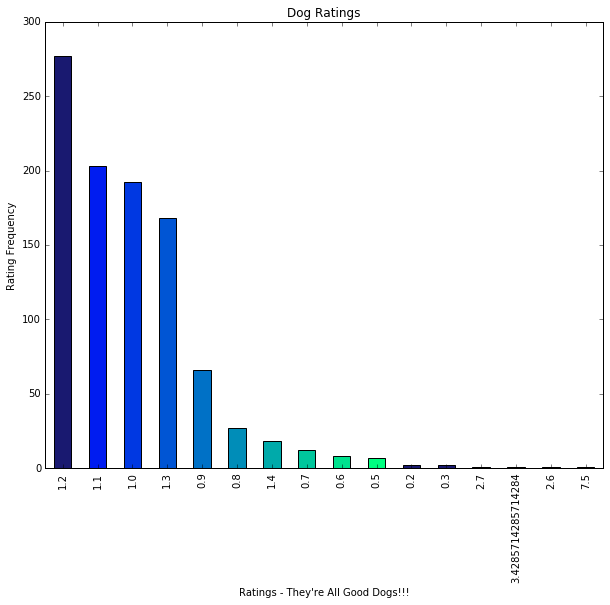

In [67]:
# dog rating numerators
dogs.rating_float.value_counts().plot.bar(figsize=(10,8), 
        color = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80' ]);
plt.title('Dog Ratings')
plt.xlabel("Ratings - They're All Good Dogs!!!")
plt.ylabel('Rating Frequency');
#plt.legend

# save as png
plt.savefig('plots/dog-ratings.png', bbox_inches='tight')

__Dog Ratings Analysis__  

They're all good dogs. But it looks like some dogs are more equal than others.

### Dog Stages EDA

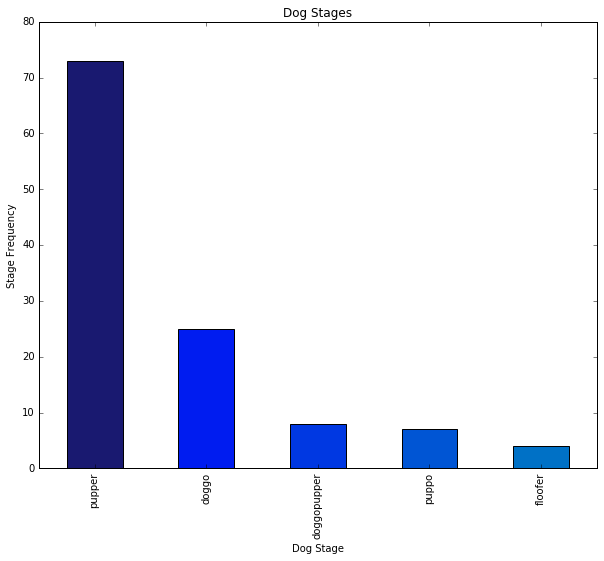

In [68]:
# dog stages 
dogs.dog_stages.value_counts().plot.bar(figsize=(10,8), 
        color = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80' ]);
plt.title('Dog Stages')
plt.xlabel("Dog Stage")
plt.ylabel('Stage Frequency');
#plt.legend

# save as png
plt.savefig('plots/dog-stages.png', bbox_inches='tight')

### Dog Breed EDA

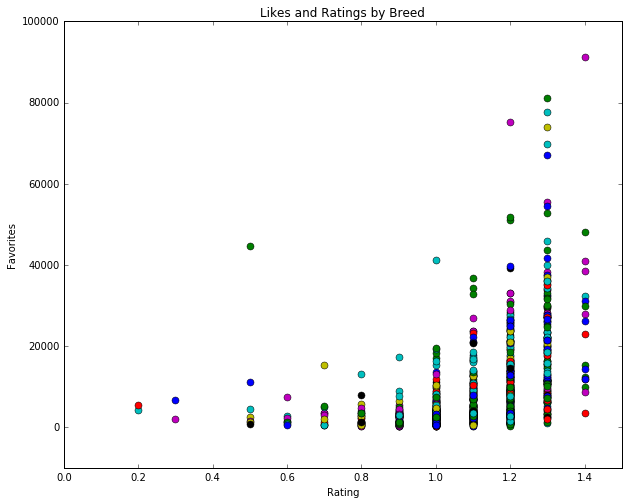

In [69]:
fig, ax = plt.subplots(figsize=(10,8))
groups = dogs.groupby('breed')
for name, group in groups:
    ax.plot(group.rating_float, group.favorite_count, marker='o', linestyle='', ms=7, label=name)
    
ax.set_title('Likes and Ratings by Breed')
ax.set_xlabel('Rating')
ax.set_ylabel('Favorites')
#ax.legend(loc='upper right')
ax.set_ylim((-10000, 100000))
ax.set_xlim((0, 1.500000));


# save as png
plt.savefig('plots/likes-vs-ratings.png', bbox_inches='tight')

### Favorites and Retweets over Time

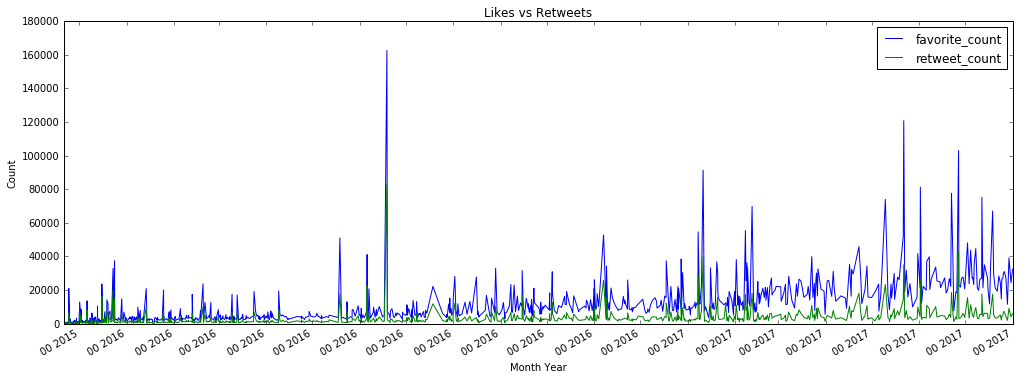

In [70]:
# read data from csv
dog_time = pd.read_csv('data/weratedogs_clean.csv', usecols=['favorite_count', 'retweet_count', 'timestamp'], parse_dates=['timestamp'])

# set date index
dog_time.set_index('timestamp', inplace=True)

# plot data
fig, ax = plt.subplots(figsize=(17,6))
dog_time.plot(ax=ax)

# set date tick marks: 
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%M %Y'))

ax.set_title('Likes vs Retweets')
ax.set_xlabel('Month Year')
ax.set_ylabel('Count');

# save as png
plt.savefig('plots/like-vs-retweet-time.png', bbox_inches='tight')

### Dog Stages and Likes

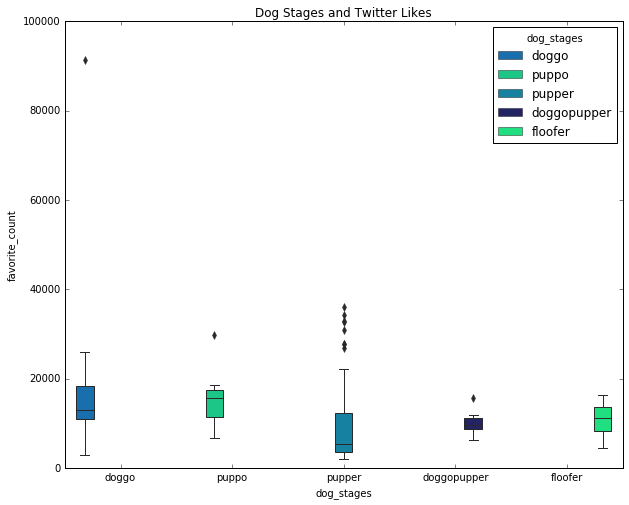

In [71]:
import seaborn as sns
plt.figure(figsize=(10,8))
my_pal = {'pupper': '#008DB8', 'doggo': '#0071C6', 'doggopupper':'#191970', 'puppo':'#00E28E', 'floofer':'#00FF80'}
sns.boxplot(x='dog_stages', y='favorite_count', data=dogs, palette=my_pal, hue='dog_stages');
plt.title('Dog Stages and Twitter Likes')

# save as png
plt.savefig('plots/like-dog-stage.png', bbox_inches='tight')


******